# Exploring the cities and trips from Nomadlist data

The assignment will be now only focusing on the city-data, dropping the people data. If you still want to play with people-data, feel free to do so but that is not required.

In [0]:
# Importing necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Importing the data
# Note, that inm Kaggle data is put into the input folder
# If you click on the data on the right,you can see the path
# Also, note that Kaggle automatically converts everything tabular
# to CSVs

cities_df = pd.read_csv("cities_df.csv")
trips_df = pd.read_csv("trips_df.csv")

## Part 1. Exploring the Cities data

* Clean up variables that you are determined to work with (not all might be relevant. Make choices.).
* Assign appropriate datatypes where needed.
* Map categorical variables to reasonable numerical values where you think it may be helpful.
* Argue for your strategy regarding missing values treatment.

In [4]:
# Explore basic features of the data

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 80 columns):
Unnamed: 0                     731 non-null int64
1 EUR in USD                   147 non-null object
1br studio rent in center      731 non-null object
A/C or heating                 716 non-null object
ATM take out: EUR 100          147 non-null object
Adult nightlife                731 non-null object
Air quality                    726 non-null object
Air quality (now)              730 non-null object
Air quality (year-round)       730 non-null object
Airbnb                         694 non-null object
Airbnb (monthly)               694 non-null object
Apartment listings             616 non-null object
Avg trip length                620 non-null object
Beer                           731 non-null object
Best 24/7 coffee place         129 non-null object
Best alt coffee place          66 non-null object
Best coffee place              484 non-null object
Best coworking space          

We can see that the data has 731 rows and a total of 80 columns including the index. Most variables are text (aka strings).

In [5]:
# Let's have a look at the first 5 rows

cities_df.head()

,Unnamed: 0,1 EUR in USD,1br studio rent in center,A/C or heating,ATM take out: EUR 100,Adult nightlife,Air quality,Air quality (now),Air quality (year-round),Airbnb,...,Weather,_id,country,country_code,country_slug,latitude,longitude,place,place_slug,place_url
0,0,NaN,"$492 / mMXN 9,333 / m",great,NaN,great,good,👍\t15 µg/m3,👍\t42 µg/m3,$31 / dMXN 589 / d,...,🌥 17.5°C / 64°F,5b55d68a0a90b6c438c67d4f,Mexico,MX,mexico,19,-99,Mexico City,mexico-city-mexico,https://nomadlist.com/mexico-city-mexico
1,1,NaN,"$223 / mMXN 4,224 / m",good,NaN,good,great,👍\t19 µg/m3,👍\t19 µg/m3,$32 / dMXN 607 / d,...,🌩 27°C / 80.5°F,5b55d68a0a90b6c438c67d50,Mexico,MX,mexico,21,-86,Cancun,cancun-mexico,https://nomadlist.com/cancun-mexico
2,2,NaN,$503 / mJOD 357 / m,okay,NaN,okay,okay,👍\t14 µg/m3,👎\t68 µg/m3,$43 / dJOD 31 / d,...,🌤 26°C / 78.5°F,5b55d68a0a90b6c438c67d51,Jordan,JO,jordan,31,35,Amman,amman-jordan,https://nomadlist.com/amman-jordan
3,3,NaN,"$426 / mVND 9,792,250 / m",okay,NaN,okay,great,👍\t23 µg/m3,👍\t23 µg/m3,"$29 / dVND 666,562 / d",...,🌩 29.5°C / 85.5°F,5b55d68a0a90b6c438c67d52,Vietnam,VN,vietnam,10,106,Ho Chi Minh City,ho-chi-minh-city-vietnam,https://nomadlist.com/ho-chi-minh-city-vietnam
4,4,NaN,"$2,740 / mHK$ 21,506 / m",great,NaN,okay,good,👍\t18 µg/m3,👍\t49 µg/m3,$70 / dHK$ 549 / d,...,🌤 32°C / 89°F,5b55d68a0a90b6c438c67d53,China,CN,china,22,114,Hong Kong,hong-kong-china,https://nomadlist.com/hong-kong-china


Some of the variables can be used right away. For example: "Air quality" which has categorical values "good", "bad" etc.

The data seems rich but messy, including emojis, and other stuff, which is typical for scraped data. 
How can we clean it up? It would be hard to clean up all 79 variables and therefore it is a good idea here to pick max 15 variables that you think are useful to understand differences between cities:

The variable "1br studio rent in center" seems interesting however it is impossible to work with data that looks like that: "$223 / mMXN 4,224 / m"

In the best case we would extract the USD values.

We can do it using string operations. Below an example:

In [0]:
# First we can split the text every time there is a space by passing 
# This will create a Series of lists
# Just paste USD_rents below into a code cell and check how it looks like

USD_rents = cities_df['1br studio rent in center'].str.split(' ')

# We take out the first element of each row using a list comprehension
# it returns a list
# However, we can make it into a Pandas Series again using pd.Series

USD_rents = pd.Series([x[0] for x in USD_rents])

In [0]:
# Finally we need to remove the $ sign and the ,
# We will use 2 times replace for that. Replacing the unwanted
# Characters by '' which means nothing

USD_rents = USD_rents.str.replace('$','')
USD_rents = USD_rents.str.replace(',','')

In [0]:
# Finally create a new column

cities_df['rents_in_usd'] = USD_rents.astype(float)

Let's clean up another column such as "population".
Here values are: "630,000 people" etc.



In [9]:
cities_df['Population'].head()

0    8,900,000 people
1      630,000 people
2    1,100,000 people
3    7,400,000 people
4    7,200,000 people
Name: Population, dtype: object

In [0]:
# Get rid of the commas
cities_df['Population'] = cities_df['Population'].str.replace(',','')

# get rid of the " people"
cities_df['Population'] = cities_df['Population'].str.replace(' people','')

# Convert it into a number (float)
cities_df['Population'] = cities_df['Population'].astype(float)

You can find more on string operations [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/text.html)

Doing similar things to another 5-6 variables and pickng some of those that are already clean, will do the job.

### Let's explore tha data a bit

In [11]:
# We can start with an easy
cities_df.describe()

,Unnamed: 0,Population,latitude,longitude,rents_in_usd
count,731.000000,4.870000e+02,731.000000,731.000000,731.000000
mean,365.000000,1.522633e+06,28.668947,11.913817,2036.186047
std,211.165812,2.966357e+06,23.281361,75.389760,36965.573810
min,0.000000,6.000000e+01,-54.000000,-171.000000,0.000000
25%,182.500000,2.100000e+05,17.500000,-57.500000,312.000000
50%,365.000000,5.600000e+05,35.000000,11.000000,554.000000
75%,547.500000,1.400000e+06,45.000000,75.000000,872.500000
max,730.000000,2.400000e+07,69.000000,178.000000,1000000.000000


In [12]:
# Let's explore other variables
cities_df['Walkability'].value_counts(normalize = True)

great    0.725034
bad      0.179207
okay     0.095759
Name: Walkability, dtype: float64

In [13]:
# Are there differences in terms of walkability across regions?

pd.crosstab(cities_df['Walkability'], cities_df['Region'], normalize=True)

Region,Africa,Asia,Europe,Latin America,Middle East,North America,Oceania,Space
Walkability,,,,,,,,
bad,0.013680,0.065663,0.049248,0.021888,0.006840,0.016416,0.005472,0.000000
great,0.035568,0.153215,0.288646,0.075239,0.020520,0.128591,0.023256,0.000000
okay,0.008208,0.025992,0.021888,0.021888,0.005472,0.008208,0.002736,0.001368


at first glanse Europe seems to offer best walkability overall but that's just a very rough "estimate"
If we think this is an interesting result, we can visualize it
If you want to go fancy with your plots, you can also use seaborn but normal pandas plots are fine, too

Go ahead and explore the data a bit more to understand the differences across countries, continents etc.

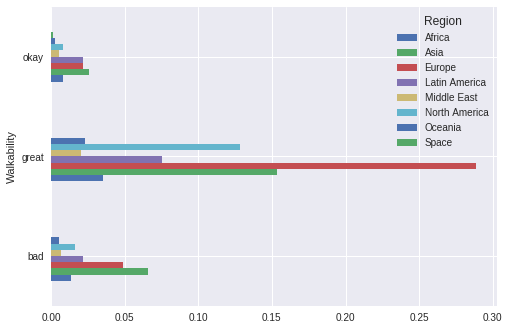

In [14]:
pd.crosstab(cities_df['Walkability'], cities_df['Region'], normalize=True).plot(kind='barh')

### Exploring city-patterns using clustering

Once you are done with some EDA,  you can try to figure out that question:
What are similar patterns across cities? Can they be categorized in a meaningful way?

For that you will need to recode variables. Here a demonstration with a few variables:

In [15]:
# Let's find out what the dimenios of some variables are

print(cities_df['Startup Score'].unique())
print(cities_df['Walkability'].unique())
print(cities_df['Quality of life'].unique())

['good' 'okay' 'great' 'bad']
['great' 'bad' 'okay']
['good' 'okay' 'great' 'bad']


In [0]:
# To recode these – just as we did in class – we can use a mapping
mapping = {'bad' : 1, 'okay' : 2, 'good' : 3, 'great' : 4}

In [0]:
# Using the mapping to recode to nummerical values
cities_df['Startup Score'] = cities_df['Startup Score'].map(mapping)
cities_df['Walkability'] = cities_df['Walkability'].map(mapping)
cities_df['Quality of life'] = cities_df['Quality of life'].map(mapping)

Let's say, you want to cluster the cities based on these 3 variables + the USD price and the population (that we made nummerical earlier)

In [0]:
# We can create a DF that only contains these columns

cities_df_clustering = cities_df[['Startup Score','Walkability','Quality of life','Population','rents_in_usd','place_slug', 'country']]

In [0]:
# First, you would drop the missing data
cities_df_clustering = cities_df_clustering.dropna()

In [0]:
# We also remove all places, which for some reason appear twice.

cities_df_clustering = cities_df_clustering.drop_duplicates(subset='place_slug', keep='first')

In [21]:
cities_df_clustering.describe()

,Startup Score,Walkability,Quality of life,Population,rents_in_usd
count,487.000000,487.000000,487.000000,4.870000e+02,487.000000
mean,2.958932,3.570842,2.864476,1.522633e+06,705.509240
std,0.733079,0.976373,0.398184,2.966357e+06,512.683145
min,1.000000,1.000000,1.000000,6.000000e+01,68.000000
25%,3.000000,4.000000,3.000000,2.100000e+05,327.000000
50%,3.000000,4.000000,3.000000,5.600000e+05,579.000000
75%,3.000000,4.000000,3.000000,1.400000e+06,912.000000
max,4.000000,4.000000,4.000000,2.400000e+07,3040.000000


In [0]:
# Lets define our X as only the nummerical values

X = cities_df_clustering.iloc[:,0:5]

Now the data is almost ready. The only thing that we need to do is to scale the values (which we can see observing the vast difference in the means and spread).

In [0]:
# Feature scaling (remember, only nummerical values are allowed here!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [0]:
# Now for the clustering we need to import Scikit-Learn
# We import KMeans and creade a model object (let's for now assume there are 3 clusters)

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

In [25]:
# Now we can fit the clustering model
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
# To find out which cities are falling into which clusters we can add the cluster labels
# to the cities_df_clustering dataframe

cities_df_clustering['cluster'] = model.labels_

In [27]:
# Let's check out the cities in cluster 0
cities_df_clustering[cities_df_clustering['cluster'] == 0]

,Startup Score,Walkability,Quality of life,Population,rents_in_usd,place_slug,country,cluster
0,3,4,3,8900000.0,492.0,mexico-city-mexico,Mexico,0
1,3,4,3,630000.0,223.0,cancun-mexico,Mexico,0
3,3,4,3,7400000.0,426.0,ho-chi-minh-city-vietnam,Vietnam,0
4,4,4,3,7200000.0,2740.0,hong-kong-china,China,0
5,3,4,3,830000.0,401.0,zhuhai-china,China,0
7,3,4,3,1600000.0,619.0,kuala-lumpur-malaysia,Malaysia,0
9,3,4,3,4300000.0,198.0,chennai-india,India,0
14,3,4,3,7000000.0,691.0,shenzhen-china,China,0
15,4,4,3,650000.0,1510.0,washington-dc-united-states,United States,0
16,4,4,3,240000.0,990.0,madison-wi-united-states,United States,0


Optional. We can also try to visualize the clustering (using PCA, which is a bit cheating but fine for our purpose)

In [35]:
!pip install -u seaborn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


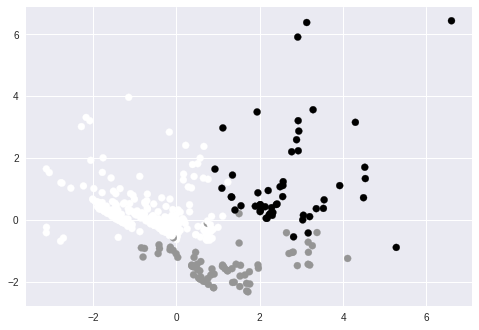

In [41]:
# This code is optional if you want to visualize the clustering without further packages) 
# PCA will transform your 5 dimensions into 2, which can be used as X and Y coordinates
# for a Scatterplot

### ADVANCED CODE ####

from sklearn.decomposition import PCA
pca = PCA()
visualization = pca.fit_transform(X)
labels = model.labels_

plt.scatter(visualization[:,0],visualization[:,1], c = labels)
plt.show()


### We could now explore which cluster was more visited, therefore maybe more popular

The easiest way is to join it with the trips and count how many times there where trips to the cluster
We know that the variable "place_slug" appears in bost dataframes, so can be used as ID for a merge

In [0]:
# Let's bring them together using "place_sluge" as the key
merged_trips = pd.merge(trips_df, cities_df_clustering, on='place_slug', how='left')

In [0]:
# quick check?
merged_trips.head()

In [0]:
# Now we can try to find the most popular cluster, simply counting the values

merged_trips['cluster'].value_counts()